# Business Case: Jamboree Education

Jamboree Education is the Asia's leading and largest test prep institute offering comprehensive classroom preparation programs for tests such as the GMAT, GRE, SAT, TOEFL, and IELTS.Jamboree has helped thousands of students make it to top colleges abroad.
They recently launched a feature where learners can come to their website and check their probability of getting into the IVY league college.This case study anlayses the chances of graduate admission into the IVY league college with the help of Linear Regression. It also explores what factors are important in graduate admissions and how these factors are interrelated among themselves. 

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import datetime
import time
warnings.simplefilter(action='ignore',category=Warning)

In [246]:
df=pd.read_csv("jamboree.csv")

In [247]:
df.shape

(500, 9)

In [248]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [249]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [250]:
df=df.drop('Serial No.',axis=1)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


We can see that there are no null records in the dataset.

In [252]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


From analysis of data description, we can say that four of the independent variables are categorical:\
1.University Rating\
2.Research\
3.SOP\
4.LOR\
and three of them are continuous:\
1.GRE Score\
2.TOEFL Score\
3.CGPA

In [167]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


There are no duplicate rows in the dataset

In [205]:
# unique values in the dataset
for col in df:
    print(f'Number of unique values in the {col} column:',df[col].nunique())

Number of unique values in the GRE Score column: 49
Number of unique values in the TOEFL Score column: 29
Number of unique values in the University Rating column: 5
Number of unique values in the SOP column: 9
Number of unique values in the LOR  column: 9
Number of unique values in the CGPA column: 184
Number of unique values in the Research column: 2
Number of unique values in the Chance of Admit  column: 61


In [9]:
df[['University Rating']].value_counts()

University Rating
3                    162
2                    126
4                    105
5                     73
1                     34
dtype: int64

In [10]:
df[['Research']].value_counts()

Research
1           280
0           220
dtype: int64

In [11]:
df[['SOP']].value_counts()

SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
dtype: int64

In [12]:
df[['LOR ']].value_counts()

LOR 
3.0     99
4.0     94
3.5     86
4.5     63
2.5     50
5.0     50
2.0     46
1.5     11
1.0      1
dtype: int64

## Visual Analysis

### Univariate Analysis

i.Categorical Variables

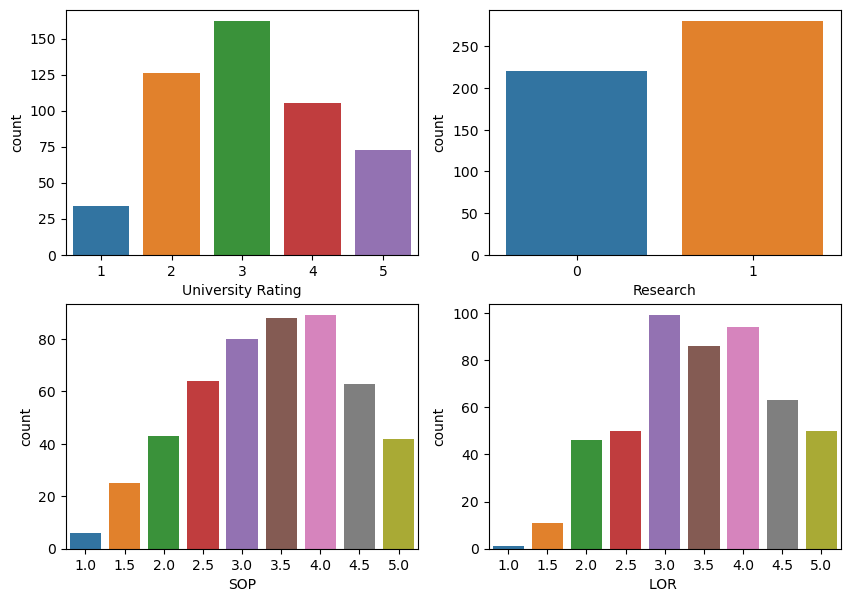

In [406]:
fig,axis= plt.subplots(2,2,figsize=(10,7)) 
sns.countplot(data=df,x="University Rating",ax=axis[0][0]) 
sns.countplot(data=df,x="Research",ax=axis[0][1])  
sns.countplot(data=df,x="SOP",ax=axis[1][0]) 
sns.countplot(data=df,x="LOR ",ax=axis[1][1])  
plt.show()  

ii. Continuous Variables

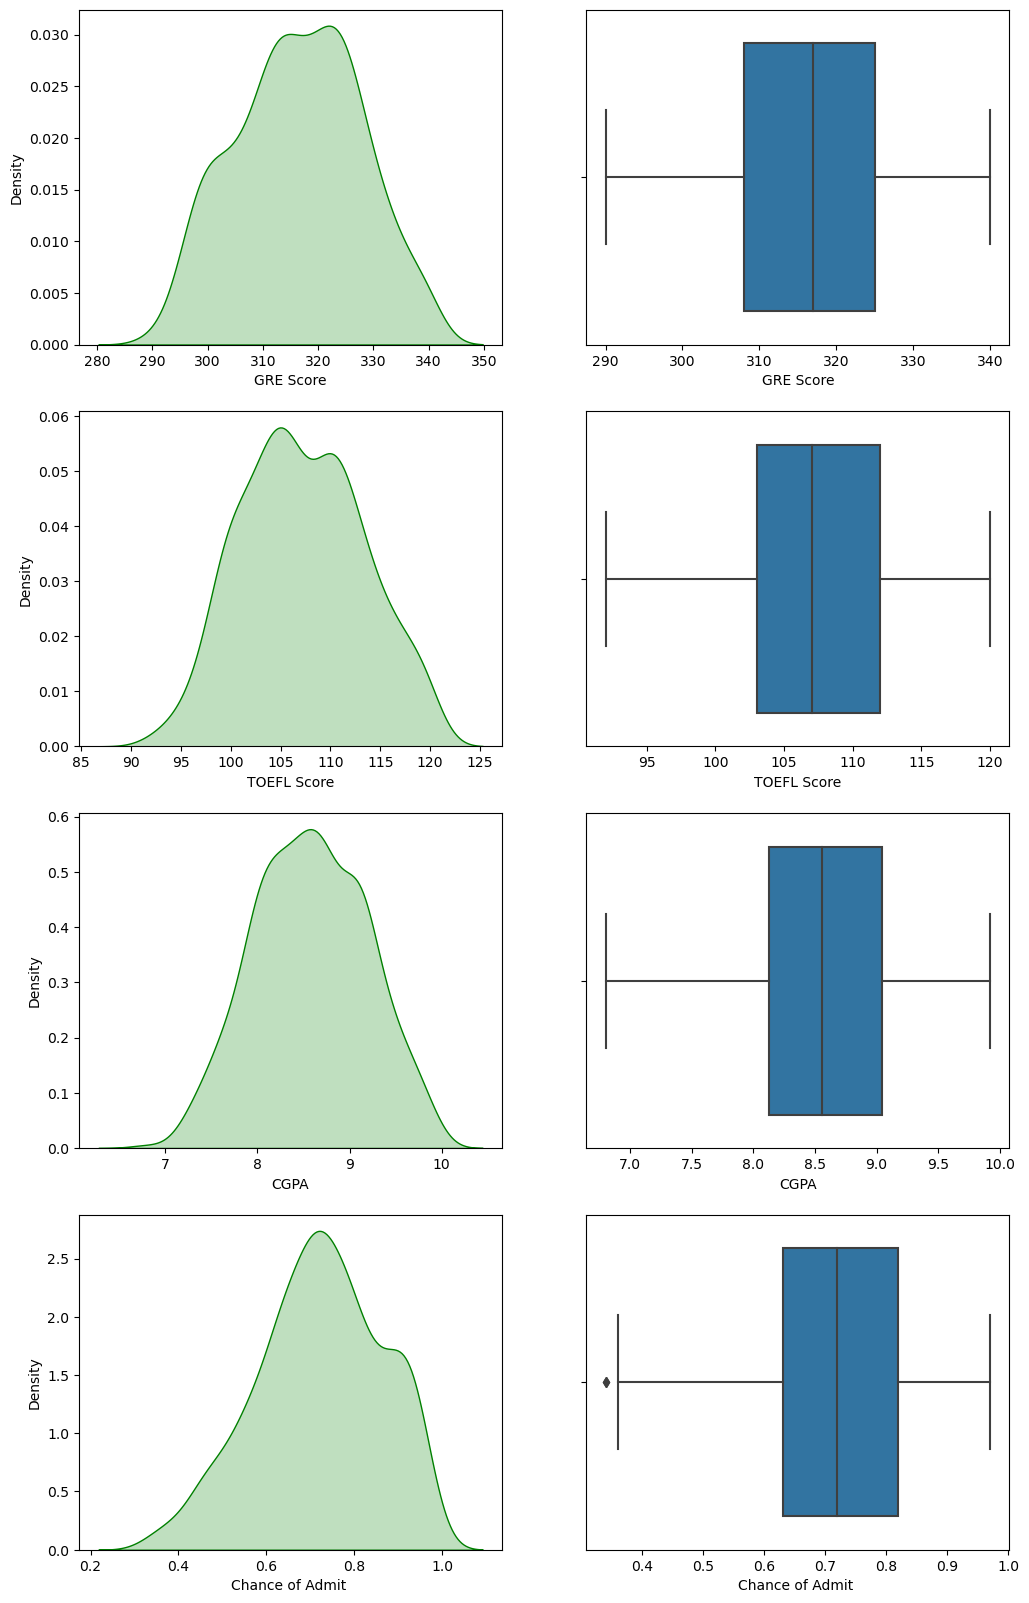

In [141]:
fig,axis= plt.subplots(4,2,figsize=(12,20)) 
sns.kdeplot(data=df,x="GRE Score",ax=axis[0][0],fill=True,color='green') 
sns.boxplot(data=df,x="GRE Score",ax=axis[0][1]) 
sns.kdeplot(data=df,x="TOEFL Score",ax= axis[1][0],fill=True,color='green') 
sns.boxplot(data=df,x="TOEFL Score",ax=axis[1][1])
sns.kdeplot(data=df,x="CGPA",ax=axis[2][0],fill=True,color='green') 
sns.boxplot(data=df,x="CGPA",ax=axis[2][1])
sns.kdeplot(data=df,x="Chance of Admit ",ax=axis[3][0],fill=True,color='green')
sns.boxplot(data=df,x="Chance of Admit ",ax=axis[3][1])
plt.show()  

### Bivariate Analysis

i.Categorical Variables

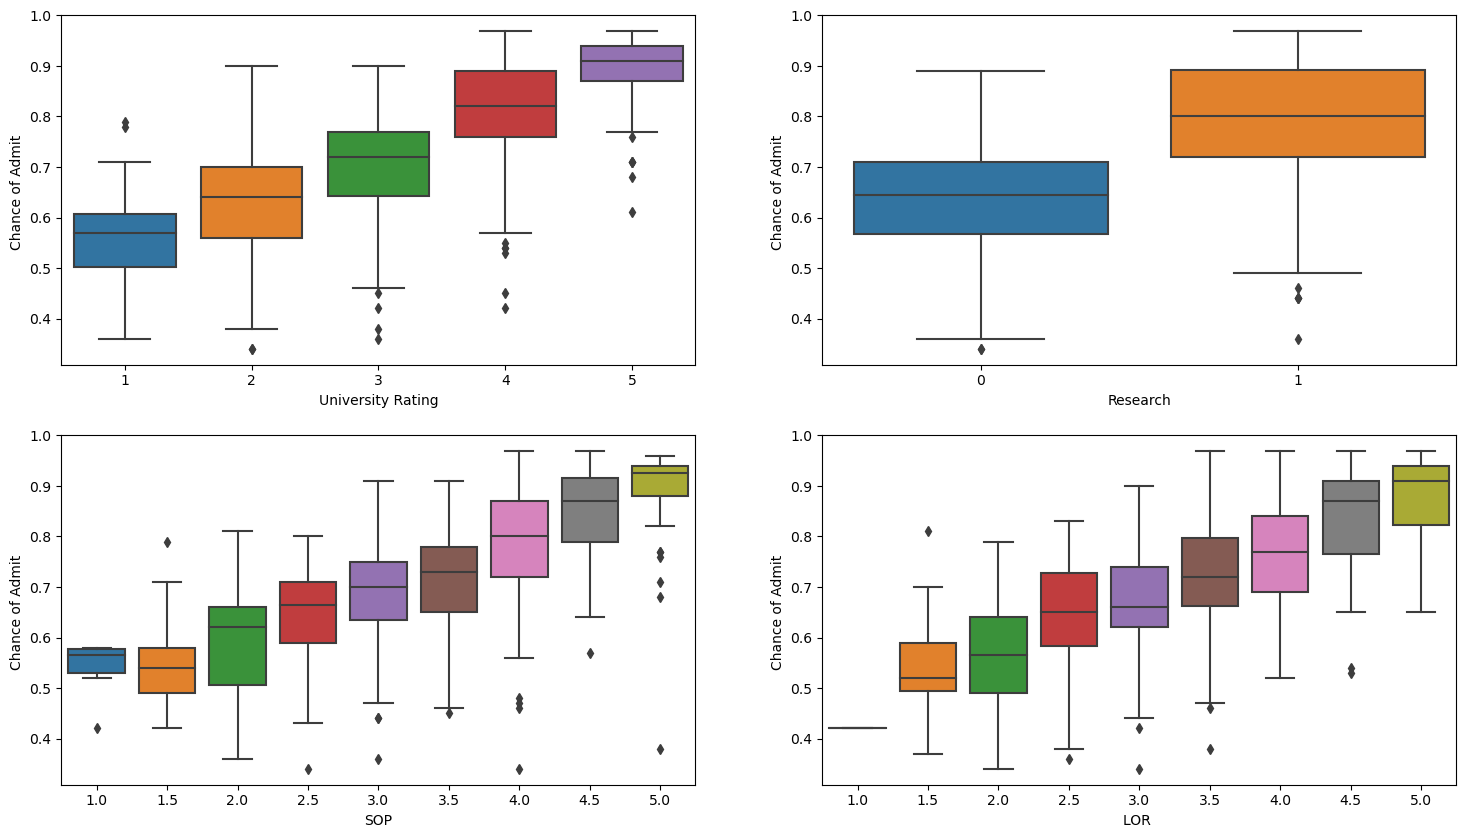

In [409]:
fig,axis= plt.subplots(2,2,figsize=(18,10)) 
sns.boxplot(data=df,x='University Rating',y="Chance of Admit ",ax=axis[0,0]) 
sns.boxplot(data=df,x="Research",y="Chance of Admit ",ax=axis[0,1]) 
sns.boxplot(data=df,x="SOP",y="Chance of Admit ",ax=axis[1,0]) 
sns.boxplot(data=df,x="LOR ",y="Chance of Admit ",ax=axis[1,1]) 
plt.show() 

ii. Continuous Variables

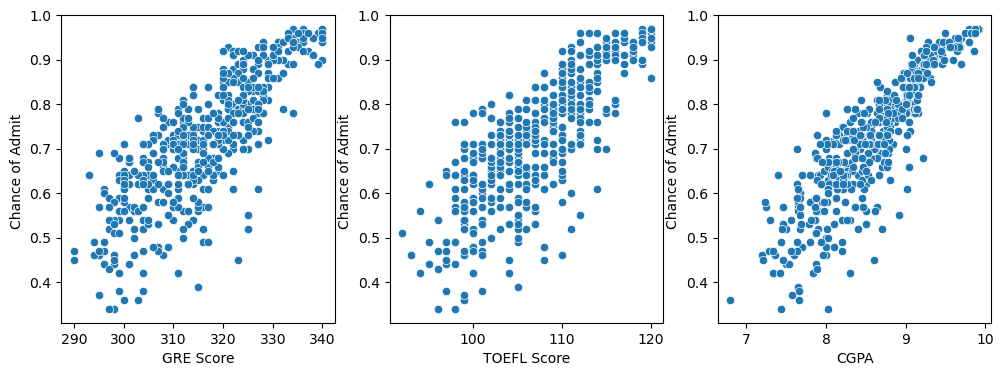

In [509]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df,x='GRE Score',y="Chance of Admit ") 
plt.subplot(1, 3, 2)
sns.scatterplot(data=df,x="TOEFL Score",y="Chance of Admit ") 
plt.subplot(1, 3, 3)
sns.scatterplot(data=df,x="CGPA",y="Chance of Admit ") 
plt.show()

<AxesSubplot:xlabel='GRE Score', ylabel='CGPA'>

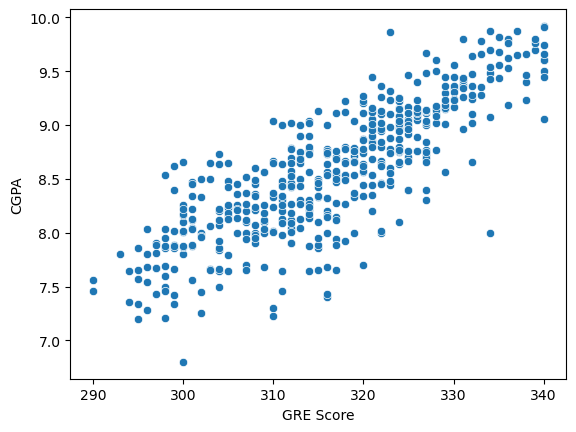

In [429]:
sns.scatterplot(data=df,x='GRE Score',y="CGPA") 

<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

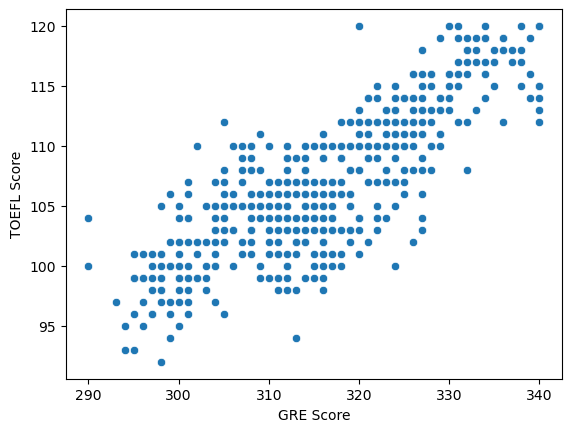

In [152]:
sns.scatterplot(data=df,x='GRE Score',y="TOEFL Score") 

<AxesSubplot:xlabel='TOEFL Score', ylabel='CGPA'>

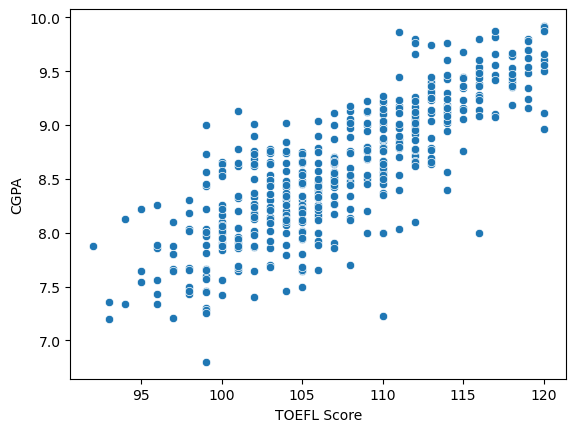

In [153]:
sns.scatterplot(data=df,x='TOEFL Score',y="CGPA") 

### Multivariate Analysis

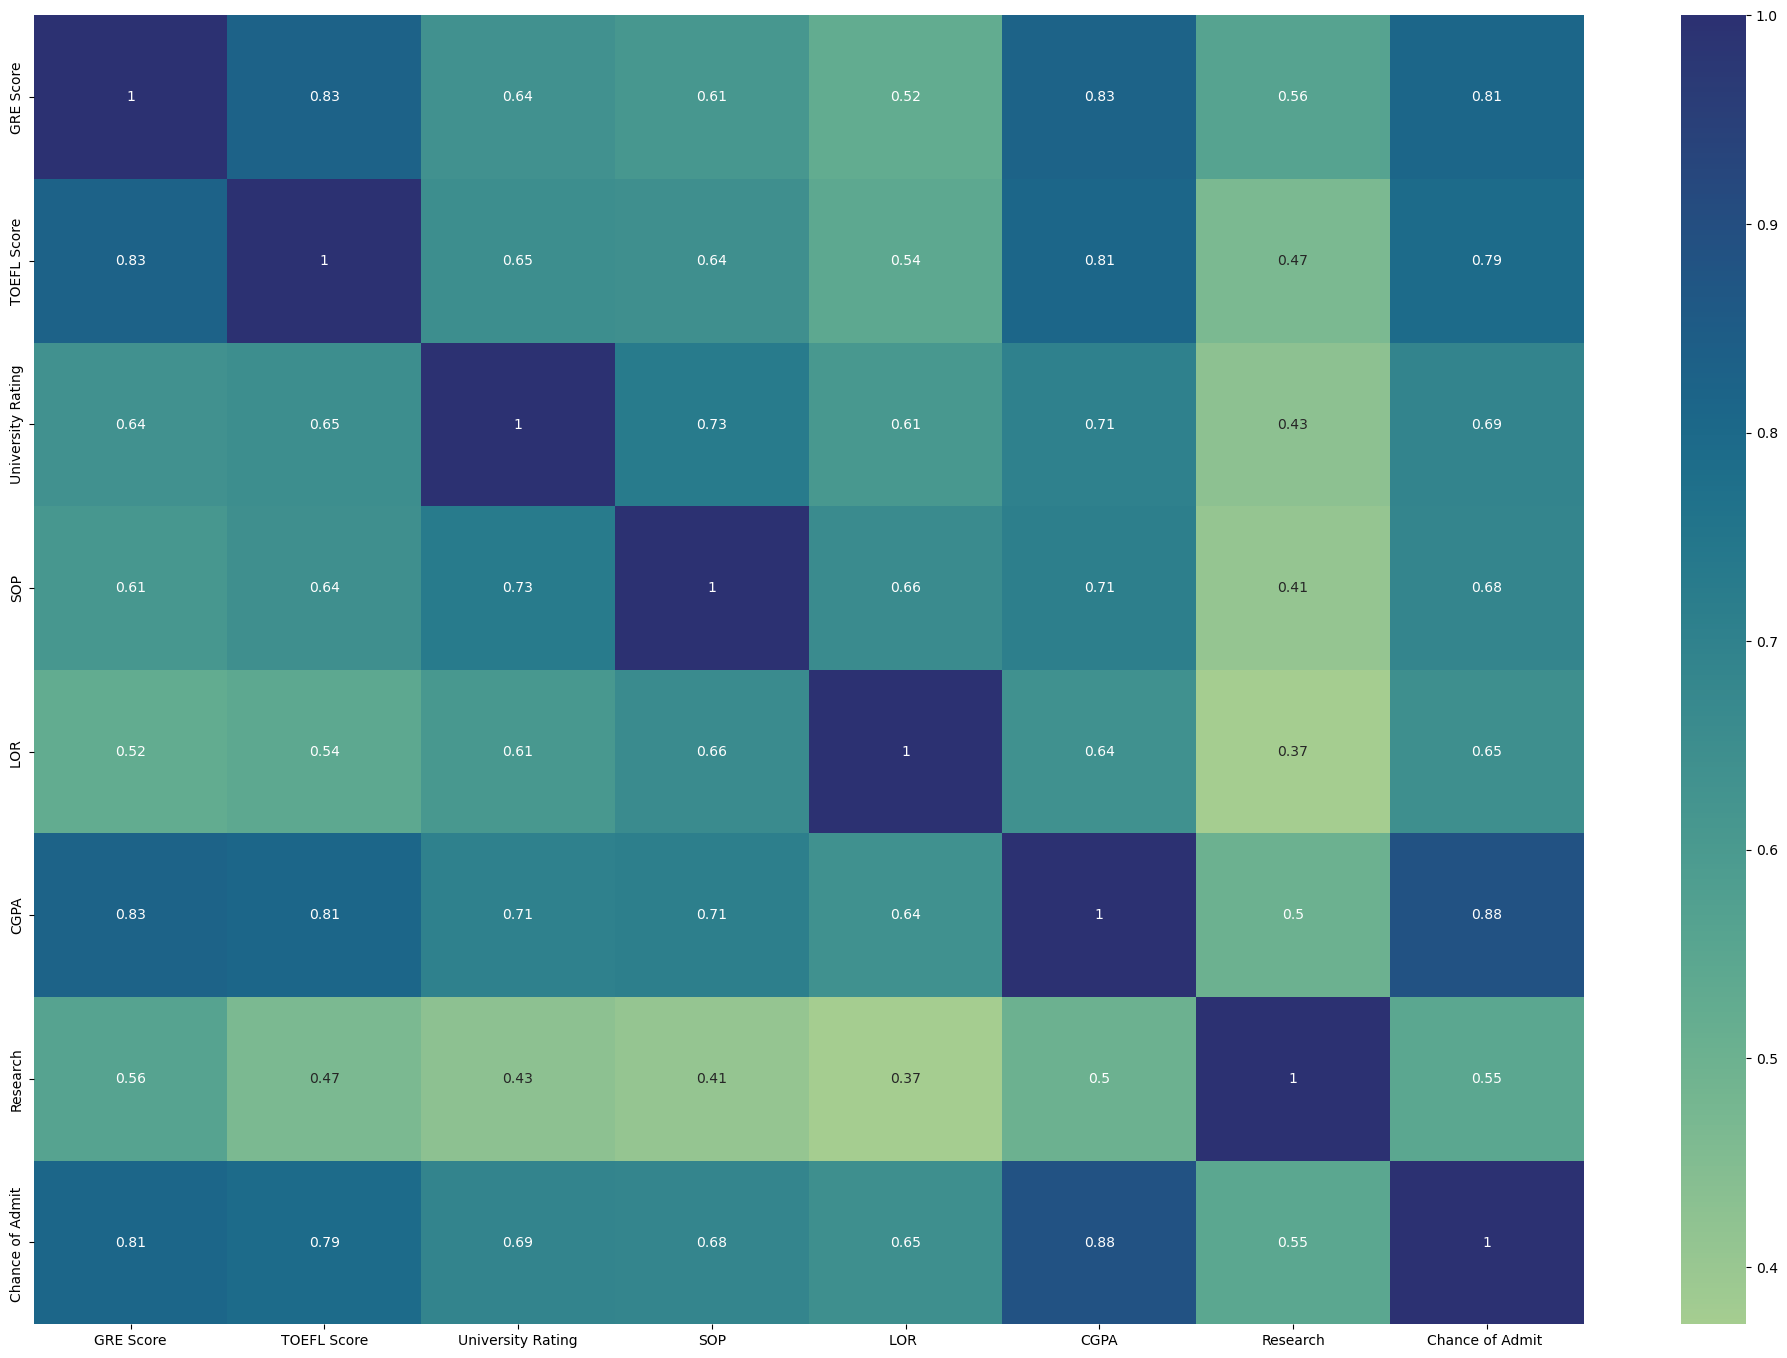

In [154]:
plt.figure(figsize=(25,17))
sns.heatmap(df.corr(), cmap="crest",annot=True)
plt.show() 

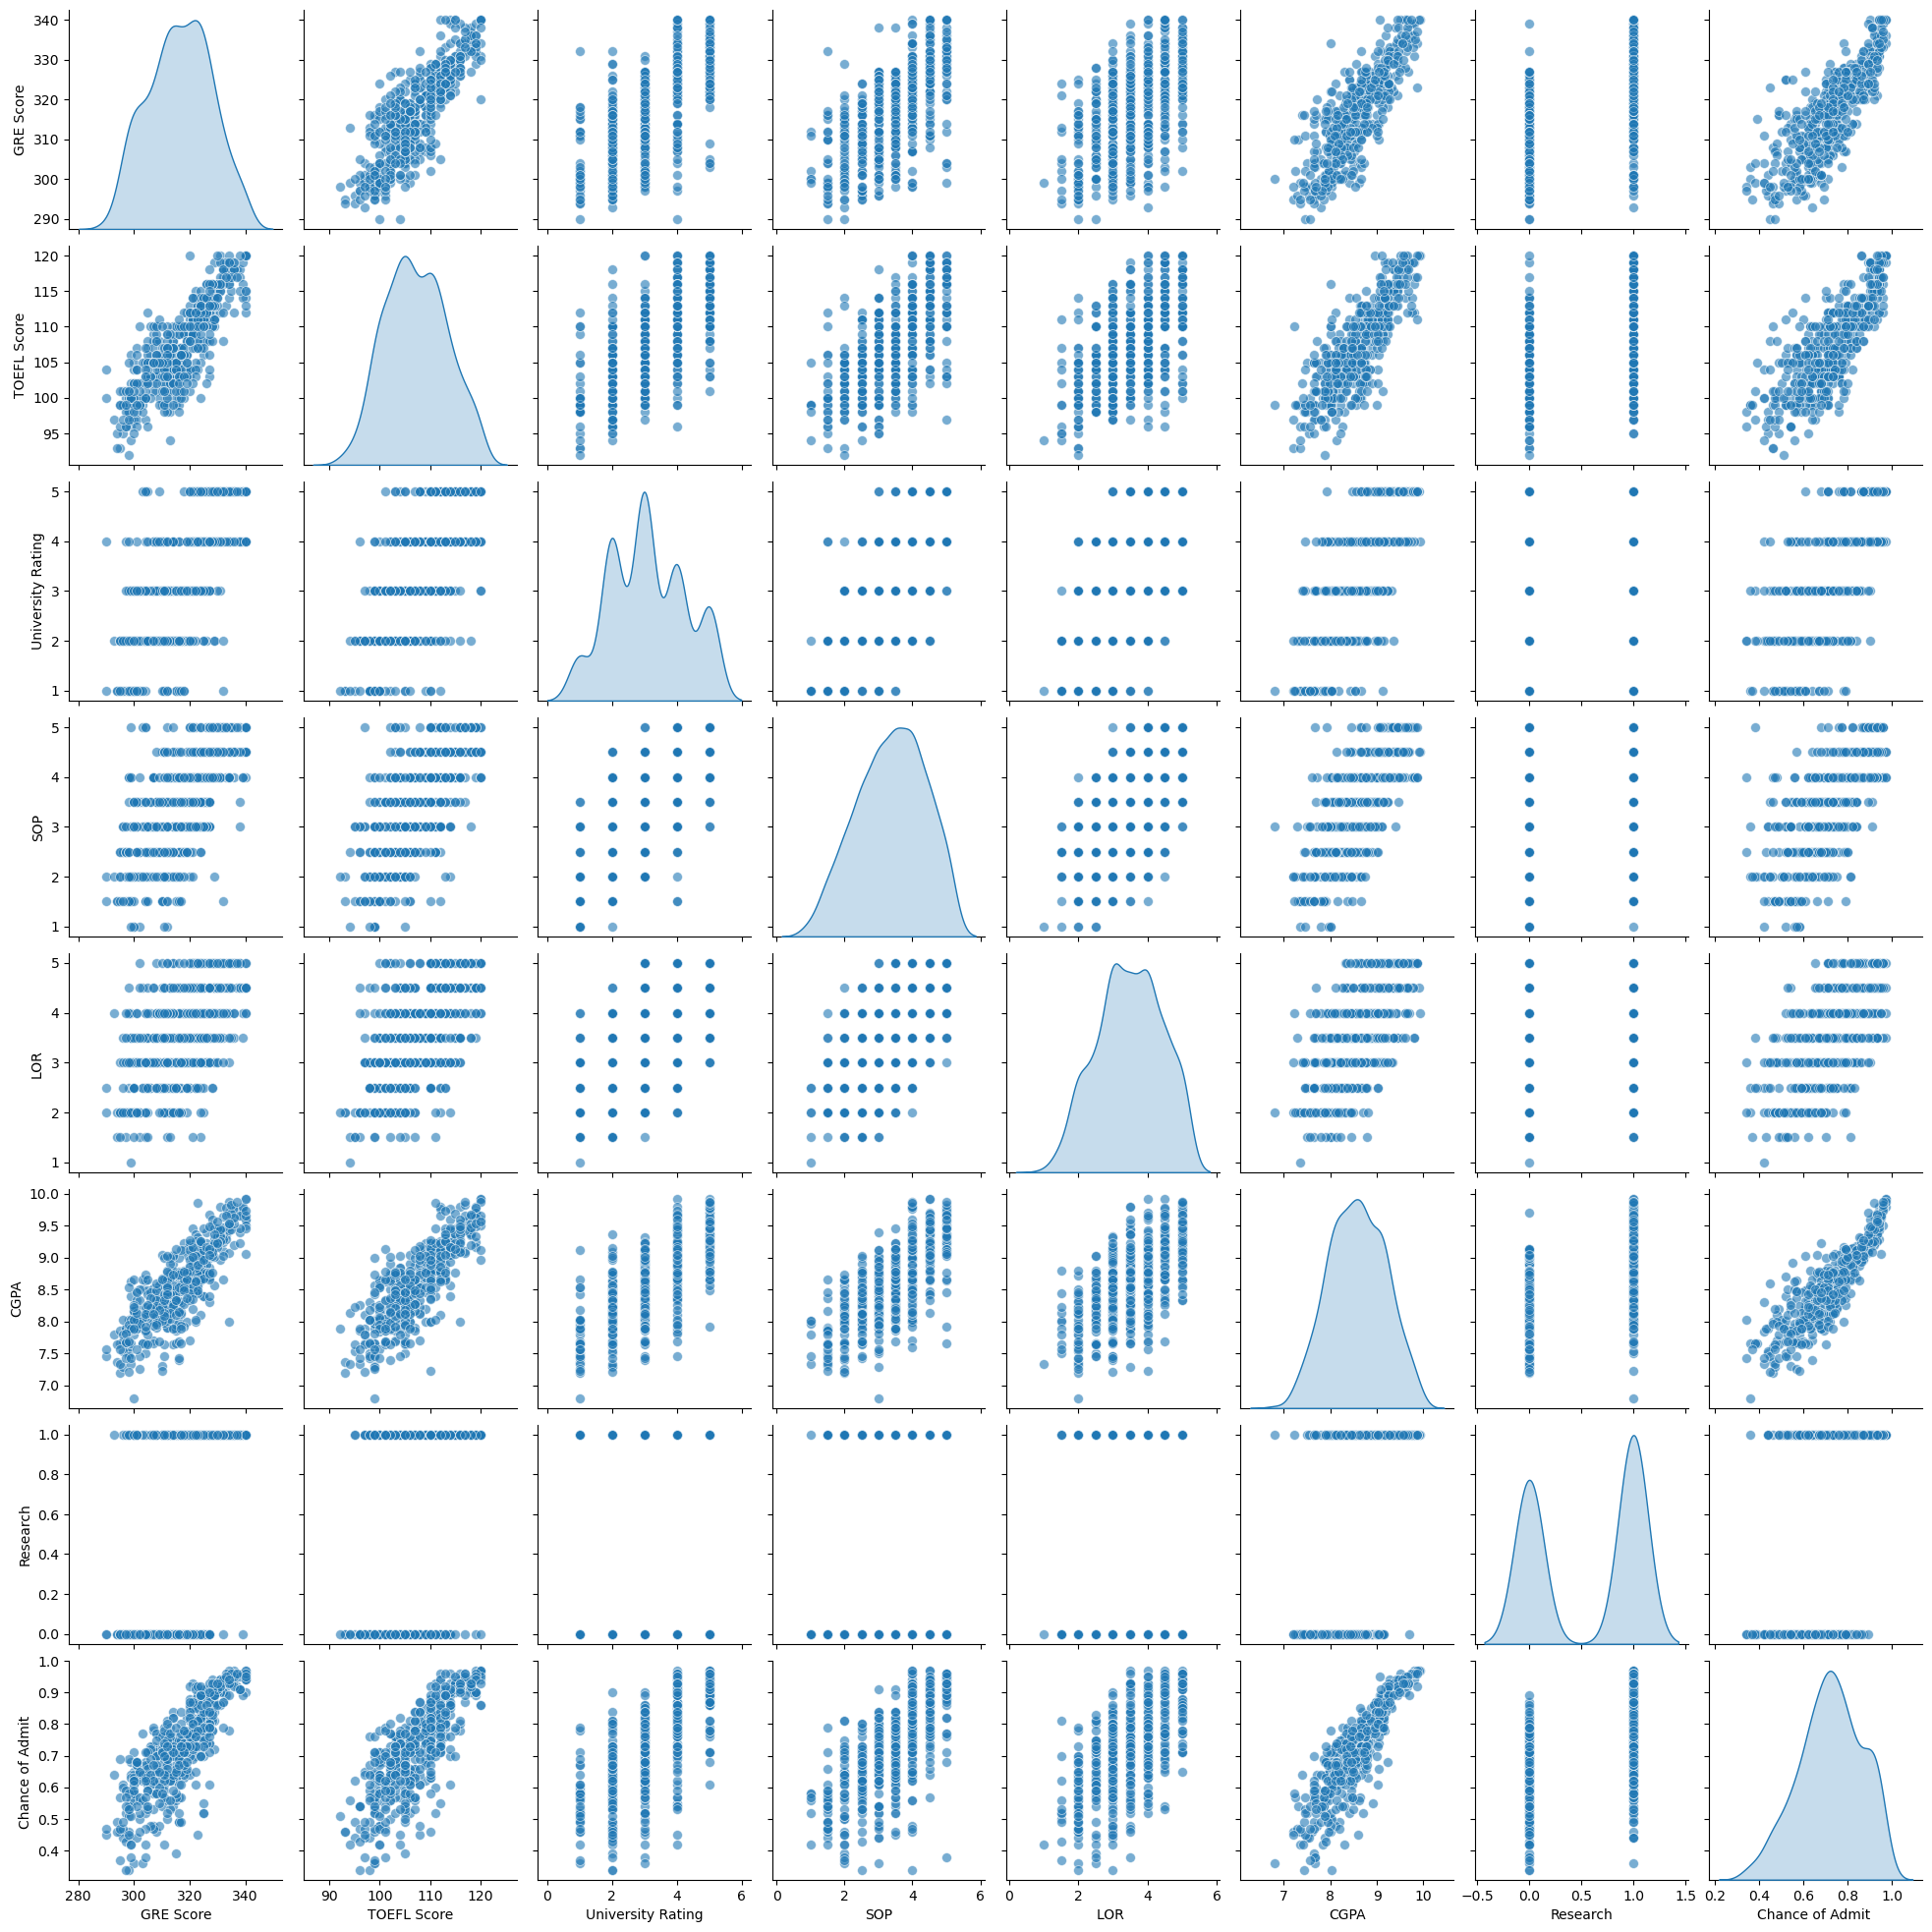

In [213]:
sns.pairplot(df, diag_kind="kde", markers="o", plot_kws={'alpha':0.6, 's':50})

### Data Splitting into Train and Test

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X = df.drop(columns='Chance of Admit ',axis=1)

In [92]:
y=df['Chance of Admit ']

In [255]:
y.head(5)

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### Standardization

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [96]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [97]:
print(X_train.shape)
print(X_test.shape)

(400, 7)
(100, 7)


In [256]:
X_train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-1.792316e-15,1.082745e-15,-1.526557e-16,1.584843e-16,-4.241052e-16,-8.604228e-17,1.323941e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.376227e+00,-2.476689e+00,-1.893933e+00,-2.434351e+00,-2.715472e+00,-2.959850e+00,-1.193416e+00
25%,-6.948823e-01,-6.983876e-01,-1.016096e+00,-9.355201e-01,-5.539023e-01,-7.467170e-01,-1.193416e+00
50%,1.305255e-02,-5.173241e-02,-1.382593e-01,6.370030e-02,-1.350981e-02,6.216482e-02,8.379306e-01
75%,7.209874e-01,7.565865e-01,7.395777e-01,5.633105e-01,5.268827e-01,7.601846e-01,8.379306e-01
max,2.048365e+00,2.049897e+00,1.617415e+00,1.562531e+00,1.607668e+00,2.164436e+00,8.379306e-01


### Linear Regression using Sklearn

In [257]:
from sklearn.linear_model import LinearRegression

In [258]:
model = LinearRegression()

In [259]:
model.fit(X_train,y_train)

LinearRegression()

In [260]:
print(f"Model Coefficients are: {model.coef_}")
print(f"Model Intercept is: {model.intercept_}")

Model Coefficients are: [0.024199   0.01713672 0.00633025 0.00051071 0.01888755 0.07005237
 0.01187669]
Model Intercept is: 0.72655


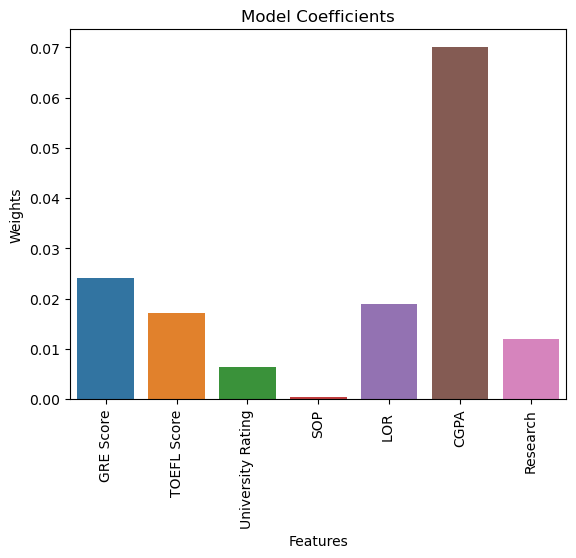

In [261]:
model_weights=zip(X_train.columns,model.coef_)
wts=pd.DataFrame(model_weights,columns=["Features","Weights"])
sns.barplot(data=wts,x="Features",y="Weights")
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show()

### Linear Regression using StatsModel Library

In [432]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

ols_model = sm.OLS(np.array(y_train), X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     277.5
Date:                Wed, 15 Jan 2025   Prob (F-statistic):          1.36e-147
Time:                        16:13:22   Log-Likelihood:                 568.04
No. Observations:                 400   AIC:                            -1120.
Df Residuals:                     392   BIC:                            -1088.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7266      0.00

### Model Performance Evaluation

In [163]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 

In [271]:
def model_score(X,y_act,y_pred):
    mae=mean_absolute_error(y_act,y_pred)
    mse=mean_squared_error(y_act,y_pred)
    r2=r2_score(y_act,y_pred)
    adjusted_r2=1-(1-r2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
    
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mse):.4f}")
    print(f"R2 Score: {r2:.2f}")
    print(f"Adjusted R2 Score: {adjusted_r2:.2f}")

In [272]:
def model_eval(model,X_train,X_test,y_train,y_test):
    print("Training Set Evaluation:")
    ytr_pred = model.predict(X_train)
    model_score(X_train,y_train,ytr_pred)
    
    print("\nTesting Set Evaluation:")
    y_pred = model.predict(X_test)
    model_score(X_test,y_test,y_pred)
    return ytr_pred,y_pred

In [189]:
ytr_pred,y_pred=model_eval(model,X_train,X_test,y_train,y_test)

Training Set Evaluation:
Mean Absolute Error: 0.0416
Root Mean Squared Error: 0.0585
R2 Score: 0.83
Adjusted R2 Score: 0.83

Testing Set Evaluation:
Mean Absolute Error: 0.0483
Root Mean Squared Error: 0.0639
R2 Score: 0.77
Adjusted R2 Score: 0.75


### Assumptions of Linear Regression  Model

#### 1.Multicollinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [337]:
vif_list = [round(variance_inflation_factor(X_train,i),2) for i in range(len(X_train.columns))]
vif = zip(X_train.columns,vif_list)
vif_df = pd.DataFrame(vif,columns = ["feature","vif"]).sort_values(by="vif",ascending=False)
vif_df

,feature,vif
5,CGPA,4.83
0,GRE Score,4.52
1,TOEFL Score,3.87
3,SOP,2.79
2,University Rating,2.56
4,LOR,2.06
6,Research,1.44


As the VIF scores of all columns are less than 5, there is no need to drop columns from the dataset to deal with multi-collinearity.

#### 2.Mean of Residuals

In [378]:
ytr_pred = model.predict(X_train)
residuals_tr = y_train - ytr_pred
residuals_tr.mean()

3.3306690738754695e-18

In [406]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred
residuals.mean()

0.004180930959275742

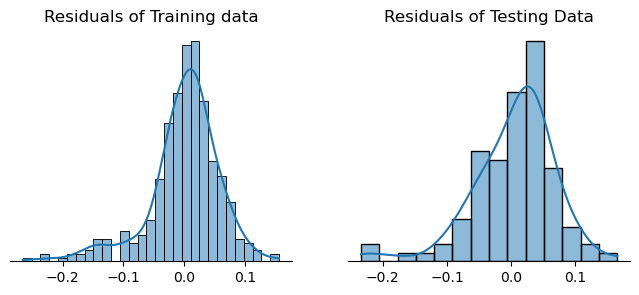

In [422]:
plt.figure(figsize=(8,3))
plt.subplot(121)
sns.histplot(residuals_tr,kde=True)
plt.title("Residuals of Training data")
sns.despine(left=True)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])
plt.subplot(122)
sns.histplot(residuals,kde=True)
plt.title("Residuals of Testing Data")
sns.despine(left=True)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])
plt.show()

As we can see that the mean of residuals is nearly equal to 0 indicating the uniform distribution of residuals.

#### 3.Linearity of variables 

In [488]:
lst=[]
for i in range(0,X_train.shape[1],2):
    lst.append(X_train.columns[i:i+2])
lst

[Index(['GRE Score', 'TOEFL Score'], dtype='object'),
 Index(['University Rating', 'SOP'], dtype='object'),
 Index(['LOR ', 'CGPA'], dtype='object'),
 Index(['Research'], dtype='object')]

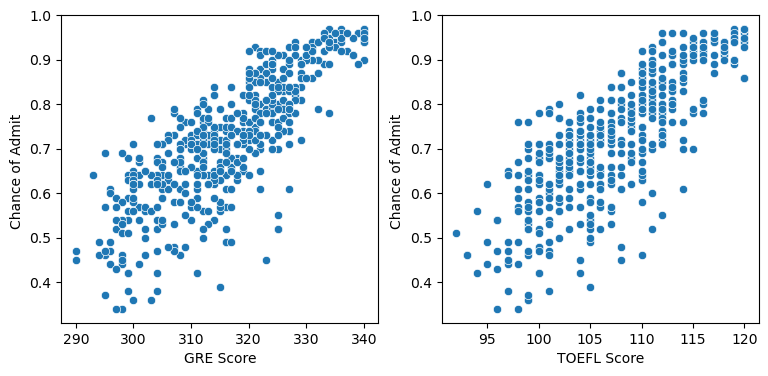

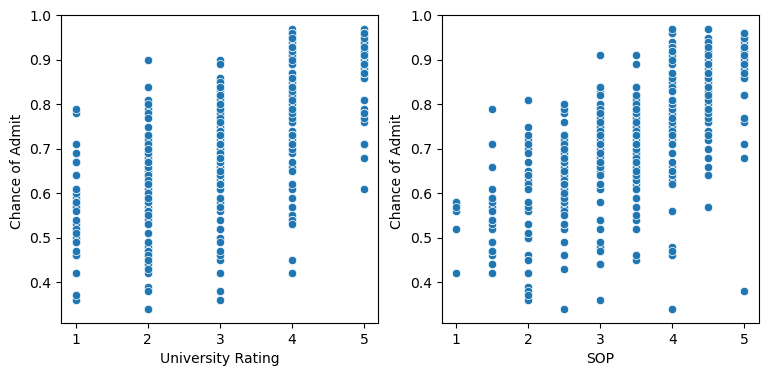

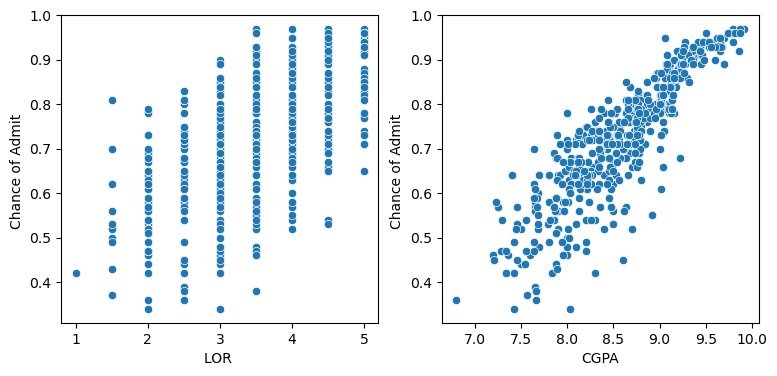

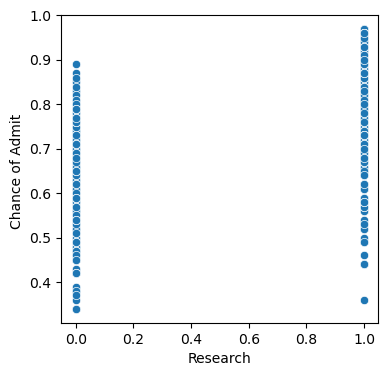

In [487]:
for i in lst:
    plt.figure(figsize=(9,4))
    plt.subplot(1,2,1)
    sns.scatterplot(data=df,x=i[0],y="Chance of Admit ") 
    if str(i[0])!='Research':
        plt.subplot(1,2,2)
        sns.scatterplot(data=df,x=i[1],y="Chance of Admit ") 
    plt.show()

In [476]:
df.corr()["Chance of Admit "]

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

From above analysis with the help of scatter plots and correlation metric, relationship between dependent variables and independent variables seems to be linear.

#### 4.Heteroscadisticity

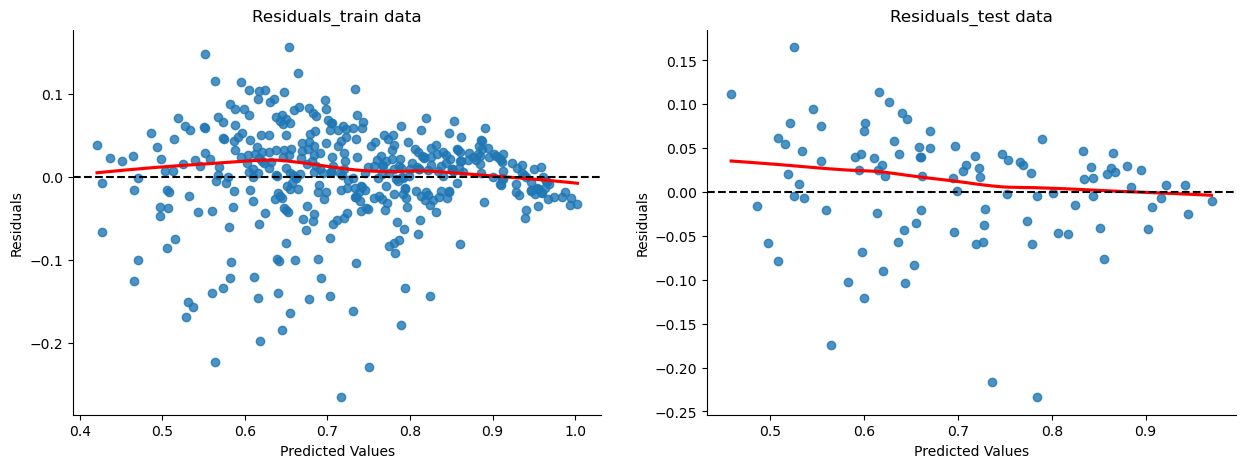

In [421]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Residuals_train data',fontsize=12)
sns.regplot(x=ytr_pred, y=residuals_tr, lowess=True,line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.subplot(122)
plt.title('Residuals_test data',fontsize=12)
sns.regplot(x=y_pred, y=residuals, lowess=True,line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
sns.despine()
plt.show()

Here, we can see there is no significant pattern observed in the residuals plot indicating homoscedasticity which means Linear Regression is suitable as the model.
If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. 

#### 5.Normality of Residuals

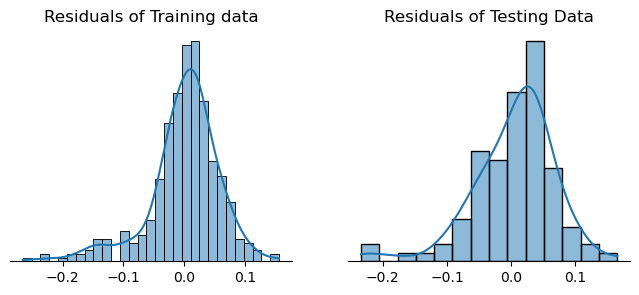

In [398]:
plt.figure(figsize=(8,3))
plt.subplot(121)
sns.histplot(residuals_tr,kde=True)
plt.title("Residuals of Training data")
sns.despine(left=True)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])
plt.subplot(122)
sns.histplot(residuals,kde=True)
plt.title("Residuals of Testing Data")
sns.despine(left=True)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])
plt.show()

In [489]:
from scipy.stats import shapiro
stat,p_value = shapiro(residuals)
print(stat)

0.9390702247619629


High value of statistic indicates that residuals follows a normal distribution.

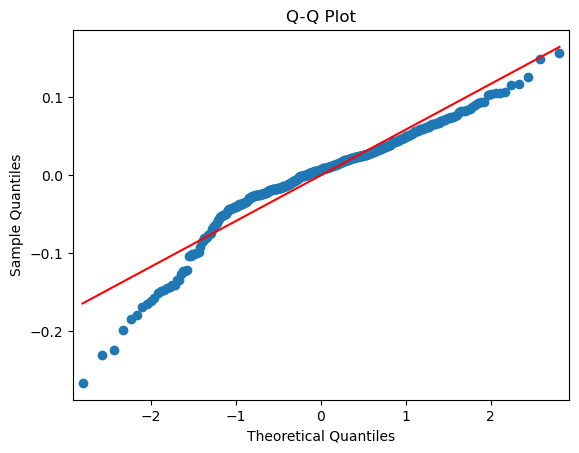

In [358]:
# Q-Q Plot
from statsmodels.api import qqplot
qqplot(residuals,line="s")
plt.title("Q-Q Plot")
plt.show()

From the above analysis using residual charts, Shapiro-Wilk test and Q-Q plot, we can say that residuals follows a normal ditribution.

## Lasso and Ridge Regression

In [355]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

<AxesSubplot:xlabel='alpha', ylabel='scores'>

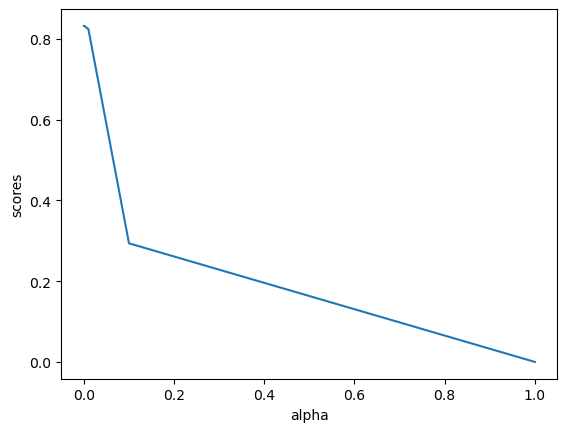

In [491]:
alpha_val=[0.0001,0.001,0.01,0.1,1]
scores=[]
for i in alpha_val:
    mod=Lasso(alpha=i)
    mod.fit(X_train,y_train)
    score=mod.score(X_train,y_train)
    scores.append(score)
temp=pd.DataFrame(zip(alpha_val,scores),columns=["alpha","scores"])
sns.lineplot(data=temp,x="alpha",y="scores")

In [493]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
print(f"Model Coefficients are: {lasso.coef_}")
print(f"Model Intercept is: {lasso.intercept_}")

Model Coefficients are: [0.02409582 0.01684178 0.00610947 0.00029603 0.01844849 0.07023694
 0.01129707]
Model Intercept is: 0.72655


In [494]:
lasso_ytr_pred,lasso_y_pred=model_eval(lasso,X_train,X_test,y_train,y_test)

Training Set Evaluation:
Mean Absolute Error: 0.0415
Root Mean Squared Error: 0.0585
R2 Score: 0.83
Adjusted R2 Score: 0.83

Testing Set Evaluation:
Mean Absolute Error: 0.0480
Root Mean Squared Error: 0.0637
R2 Score: 0.77
Adjusted R2 Score: 0.75


<AxesSubplot:xlabel='alpha', ylabel='scores'>

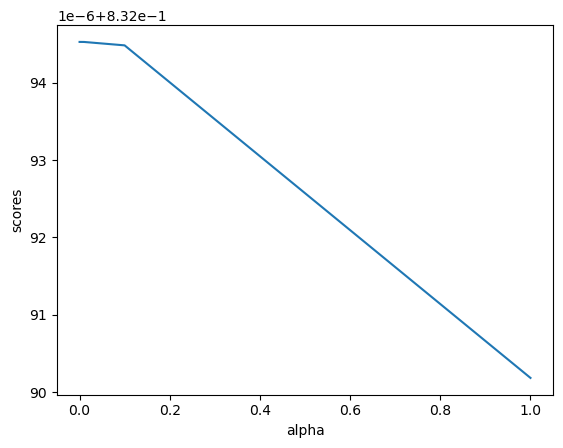

In [495]:
alpha_val=[0.0001,0.001,0.01,0.1,1]
scores=[]
for i in alpha_val:
    mod=Ridge(alpha=i)
    mod.fit(X_train,y_train)
    score=mod.score(X_train,y_train)
    scores.append(score)
temp=pd.DataFrame(zip(alpha_val,scores),columns=["alpha","scores"])
sns.lineplot(data=temp,x="alpha",y="scores")

In [497]:
temp

,alpha,scores
0,0.0001,0.832095
1,0.0010,0.832095
2,0.0100,0.832095
3,0.1000,0.832094
4,1.0000,0.832090


In [499]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
print(f"Model Coefficients are: {ridge.coef_}")
print(f"Model Intercept is: {ridge.intercept_}")

Model Coefficients are: [0.0243554  0.01729153 0.00641175 0.00067271 0.01891273 0.06943147
 0.01188715]
Model Intercept is: 0.72655


In [500]:
ridge_ytr_pred,ridge_y_pred=model_eval(ridge,X_train,X_test,y_train,y_test)

Training Set Evaluation:
Mean Absolute Error: 0.0416
Root Mean Squared Error: 0.0585
R2 Score: 0.83
Adjusted R2 Score: 0.83

Testing Set Evaluation:
Mean Absolute Error: 0.0483
Root Mean Squared Error: 0.0639
R2 Score: 0.77
Adjusted R2 Score: 0.75


<AxesSubplot:xlabel='alpha', ylabel='scores'>

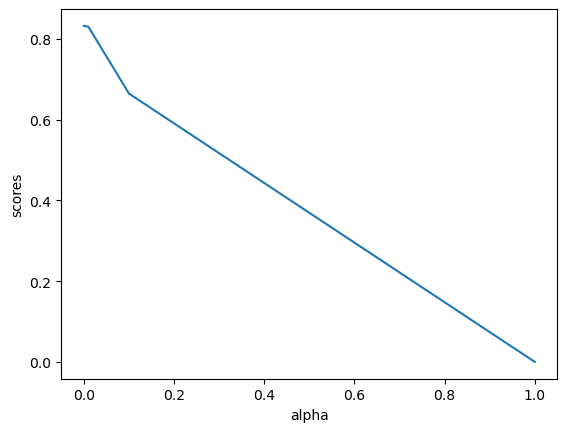

In [334]:
alpha_val=[0.0001,0.001,0.01,0.1,1]
scores=[]
for i in alpha_val:
    mod=ElasticNet(alpha=i)
    mod.fit(X_train,y_train)
    score=mod.score(X_train,y_train)
    scores.append(score)
temp=pd.DataFrame(zip(alpha_val,scores),columns=["alpha","scores"])
sns.lineplot(data=temp,x="alpha",y="scores")

In [505]:
elasticnet = ElasticNet(alpha=0.01)
elasticnet.fit(X_train , y_train)
elastic_ytr_pred,elastic_y_pred=model_eval(elasticnet,X_train,X_test,y_train,y_test)

Training Set Evaluation:
Mean Absolute Error: 0.0415
Root Mean Squared Error: 0.0588
R2 Score: 0.83
Adjusted R2 Score: 0.83

Testing Set Evaluation:
Mean Absolute Error: 0.0472
Root Mean Squared Error: 0.0631
R2 Score: 0.77
Adjusted R2 Score: 0.75


### Actual vs Predicted

[Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted'),
 Text(0.5, 1.0, 'Elastic Net Regression')]

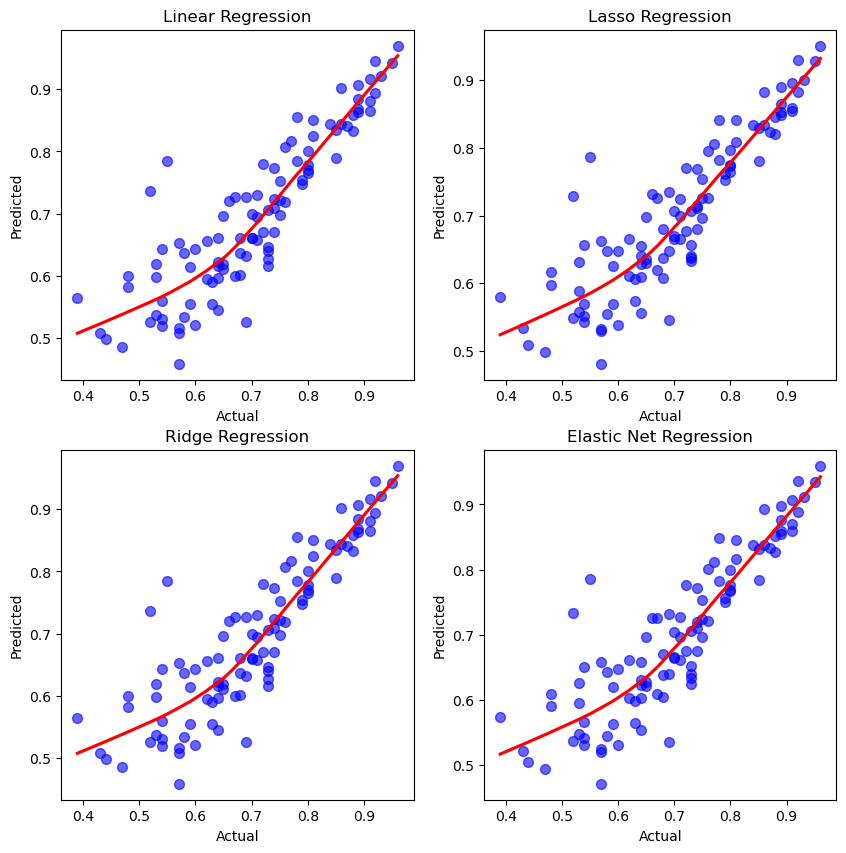

In [310]:
fig,axis=plt.subplots(2,2,figsize=(10,10))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.6, 's': 50, 'color': 'blue'},line_kws={'color': 'red'}, lowess=True,ax=axis[0][0])
sns.regplot(x=y_test, y=lasso_y_pred, scatter_kws={'alpha': 0.6, 's': 50, 'color': 'blue'},line_kws={'color': 'red'}, lowess=True,ax=axis[0][1])
sns.regplot(x=y_test, y=ridge_y_pred, scatter_kws={'alpha': 0.6, 's': 50, 'color': 'blue'},line_kws={'color': 'red'}, lowess=True,ax=axis[1][0])
sns.regplot(x=y_test, y=elastic_y_pred, scatter_kws={'alpha': 0.6, 's': 50, 'color': 'blue'},line_kws={'color': 'red'}, lowess=True,ax=axis[1][1])
axis[0,0].set(xlabel="Actual",ylabel="Predicted",title='Linear Regression')
axis[0,1].set(xlabel="Actual",ylabel="Predicted",title="Lasso Regression")
axis[1,0].set(xlabel="Actual",ylabel="Predicted",title="Ridge Regression")
axis[1,1].set(xlabel="Actual",ylabel="Predicted",title="Elastic Net Regression")

## Features vs Weights

Text(0.5, 1.0, 'Elastic Net Regression')

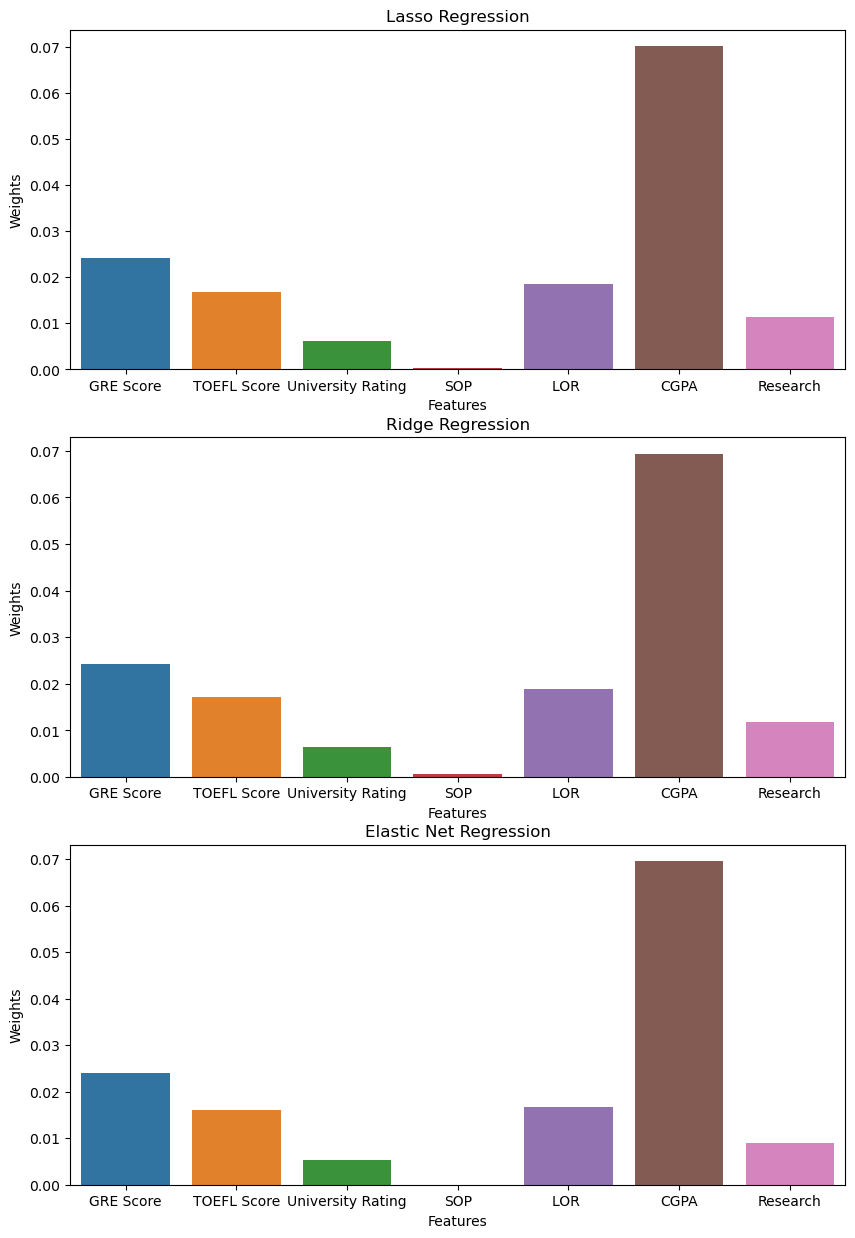

In [506]:
lasso_wts=pd.DataFrame(zip(X_train.columns,lasso.coef_),columns=["Features","Weights"])
ridge_wts=pd.DataFrame(zip(X_train.columns,ridge.coef_),columns=["Features","Weights"])
elasticnet_wts=pd.DataFrame(zip(X_train.columns,elasticnet.coef_),columns=["Features","Weights"])
fig,axis=plt.subplots(3,1,figsize=(10,15))
sns.barplot(data=lasso_wts, x="Features",y="Weights",ax=axis[0])                                                        
sns.barplot(data=ridge_wts, x="Features",y="Weights",ax=axis[1])
sns.barplot(data=elasticnet_wts,x="Features",y="Weights",ax=axis[2])
axis[0].set_title("Lasso Regression")
axis[1].set_title("Ridge Regression")
axis[2].set_title("Elastic Net Regression")

## Insights: 

1. According to feature weights, CGPA,TOEFL, GRE scores and LOR are the most important features for the Linear Regression model.
2. CGPA, TOEFL and GRE scores are highly correlated.
3. As per the analysis of assumptions of Linear Regression, features are not multi-collinear.
4. We are getting same accuracy scores in all models: Base Linear Regression,Lasso Regression,Ridge Regression and Elastic Net Regression.

## Recommendation:

1. Students should focus on achieving higher GRE, TOEFL, LOR and CGPA scores.As the probability of getting admission increases based on these factors.
2. Since CGPA,TOEFL and GRE scores are highly correlated, more features can be included in the dataset to build a better model for prediction of admission chances
3.  Features such as internship experience, hobbies, extra-curricular activities, etc. can be included in the analysis to get the improved version of Linear Regression Model.